In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas
# import newspaper
from defname import *

In [2]:
def wenzi(list_1,z):
    list_2 = []
    i = 0
    for x in list_1:
        y = x
        tr = y.find(z)
        if tr > -1 :
            i = i+1
            list_2.append(x)
    print('关于' + '“' + zi + '”' + '的订单数量是：',i)  
    return list_2


def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list


def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line


def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_1 = {}
    dict_2 = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()    
        if sum_ > 1 :
            list__.append(b)
            dict_1 = {b:sum_}
        else:
            list__.append(b)
            dict_2 = {b:sum_}          
        i = i + 1  
    list_sum_.append(dict_2)
    list_sum.append(dict_1)
    k = [list_sum,list_sum_,list__]
    return k

In [3]:
data = pd.read_csv('data/九月订单.csv',encoding= 'gbk ')

FileNotFoundError: [Errno 2] No such file or directory: 'data/九月订单.csv'

In [9]:
df = data

In [10]:
df['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d') 
df['下单日期'] =df['下单时间'].dt.day

In [11]:
df = df[(df['下单日期'] <9) | (df['下单日期'] > 10)]
df

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单日期
0,\t20200901-20200930,2270350038720801,2020-09-08 14:13:49,33秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,1167.0,414.0,0.0,753.0,教师节-鲜花预定\t,致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】,NaN,821\t,3,1167.0,414.0,753.0,753.0,0.0,否,0,0.0,0.0,0.0,是,购买致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】原价389.0元现价139.0元/购买致...,否,未回复,NaN,0.00分,0.0,2020-09-08 23:22:43\t,NaN,8
4,\t20200901-20200930,2270351255749570,2020-09-13 15:26:15,95秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,219.0,85.0,0.0,134.0,11枝-玫瑰\t,一笑千金【9枝粉玫瑰满天星鲜花花束】,NaN,136\t,1,219.0,85.0,134.0,134.0,0.0,否,0,0.0,0.0,0.0,是,购买一笑千金【9枝粉玫瑰满天星鲜花花束】原价219.0元现价88.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-14 00:27:55\t,NaN,13
5,\t20200901-20200930,2270350609849195,2020-09-14 13:49:18,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单已处理,用户提交订单,是,250.0,85.0,0.0,165.0,生日鲜花\t,冰清玉润【3枝向日葵+3枝粉玫瑰表白鲜花花束】,NaN,947\t,1,250.0,85.0,165.0,165.0,0.0,否,0,0.0,0.0,0.0,是,购买冰清玉润【3枝向日葵+3枝粉玫瑰表白鲜花花束】原价250.0元现价88.0元/门店新客立...,否,未回复,NaN,0.00分,0.0,NaN,NaN,14
6,\t20200901-20200930,2270353968100773,2020-09-14 13:49:25,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单取消,用户提交订单,是,168.0,115.0,0.0,53.0,生日祝福\t,见花如见面【11枝红玫瑰搭配尤加利花束】,NaN,925\t,1,168.0,115.0,53.0,53.0,0.0,否,0,0.0,0.0,0.0,是,满100.0元减50.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,NaN,其他\t,14
7,\t20200901-20200930,2270351030451260,2020-09-17 15:23:20,14秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,198.0,105.0,0.0,93.0,生日鲜花\t,言传身教【2枝向日葵+6枝香槟鲜花花束】,NaN,262\t,1,198.0,105.0,93.0,93.0,0.0,否,0,0.0,0.0,0.0,是,购买言传身教【2枝向日葵+6枝香槟鲜花花束】原价198.0元现价108.0元/门店新客立减3...,否,未回复,NaN,0.00分,0.0,2020-09-18 00:20:33\t,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,\t20200901-20200930,100588313587728339,2020-09-29 13:06:31,77秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,68.0,33.9,0.0,34.1,家居鲜花\t,【日常家居鲜花】3枝香槟玫瑰（无包装，同价位商品可备注更换）,NaN,361\t,1,58.0,26.9,31.1,31.1,0.0,否,0,0.0,0.0,10.0,是,购买【日常家居鲜花】3枝香槟玫瑰（不带包装）原价58.0元现价29.9元/门店新客立减3.0...,否,已回复,NaN,0.00分,0.0,2020-09-29 15:42:19\t,NaN,29
33740,\t20200901-20200930,100588313118279887,2020-09-29 14:03:02,43秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-29 15:22:50\t,NaN,29
33741,\t20200901-20200930,100588313981997524,2020-09-30 12:28:16,27秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-30 13:38:52\t,NaN,30
33742,\t20200901-20200930,100665062519384436,2020-09-27 14:30:13,41秒,流星花园（生日花，表白花，鲜花）\t,10066506,衢州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-27 21:35:42\t,NaN,27


In [12]:
a = duplicates(df,'商品分类')


In [13]:
a

[['?§¤?\t',
  '精美向日葵\t',
  '爱之蔓推荐\t',
  '邂逅推荐||11枝-玫瑰||19枝-玫瑰||33枝-玫瑰||未分类\t',
  '精品干花\t',
  '未分类\t',
  '爱的纪念||生日祝福||表白鲜花\t',
  '太阳花区\t',
  '蓝色妖姬\t',
  '表白鲜花\t',
  '邂逅推荐\t',
  '高端礼盒\t',
  '教师节-鲜花预定\t',
  '小众鲜花\t',
  '33枝-玫瑰\t',
  '满天星区\t',
  '52枝-玫瑰\t',
  '99枝-玫瑰\t',
  '19枝-玫瑰\t',
  '康乃馨区\t',
  '活动专区\t',
  '开业花篮\t',
  '11枝-玫瑰\t',
  '生日鲜花\t',
  '生日祝福\t',
  '家居鲜花\t',
  '节日折扣\t'],
 {'?§¤?\t': 2,
  '精美向日葵\t': 4,
  '爱之蔓推荐\t': 64,
  '邂逅推荐||11枝-玫瑰||19枝-玫瑰||33枝-玫瑰||未分类\t': 3,
  '精品干花\t': 3,
  '未分类\t': 14,
  '爱的纪念||生日祝福||表白鲜花\t': 2,
  '太阳花区\t': 35,
  '蓝色妖姬\t': 55,
  '表白鲜花\t': 236,
  '邂逅推荐\t': 750,
  '高端礼盒\t': 170,
  '教师节-鲜花预定\t': 1809,
  '小众鲜花\t': 290,
  '33枝-玫瑰\t': 1219,
  '满天星区\t': 263,
  '52枝-玫瑰\t': 295,
  '99枝-玫瑰\t': 214,
  '19枝-玫瑰\t': 1390,
  '康乃馨区\t': 485,
  '活动专区\t': 441,
  '开业花篮\t': 671,
  '11枝-玫瑰\t': 1854,
  '生日鲜花\t': 8005,
  '生日祝福\t': 694,
  '家居鲜花\t': 1148,
  '节日折扣\t': 797},
 {'开业绿植\t': 1,
  '邂逅推荐||19枝-玫瑰\t': 1,
  '?生日鲜花\t': 1,
  '?11枝-玫瑰\t': 1,
  '绿植盆栽\t': 1,
  '婚车手捧花\t': 1,
  '康乃馨区|

In [14]:
data_x = pd.DataFrame.from_dict(a[1],orient = 'index')

In [15]:
data_x.to_csv('data_x.csv')

In [55]:
data_name_ = df.loc[:,'商品名称']
list_name = list(data_name_)

In [56]:
stopwords = pd.read_csv('清理文档.txt' , index_col=False,sep='\t',names = ['h'],encoding='gbk')
stopwords_ = list(stopwords['h'])

In [57]:
text_list= clean(text_list,stopwords_)

In [58]:
text_list

['致敬,园丁,9,枝粉,玫瑰,2,枝,向日葵,教师节',
 '一笑千金,9,枝粉,玫瑰,满天星',
 '冰清玉润,3,枝,向日葵,3,枝粉,玫瑰,表白',
 '见花,如,见面,11,枝,红玫瑰,尤加利',
 '言传身教,2,枝,向日葵,6,枝,香槟',
 '情深,蒂固,19,枝,红玫瑰,尤加利,送,朋友',
 '师恩,似海,3,枝,向日葵,3,枝粉,玫瑰,教师节',
 '向往,的,生活,3,朵,向日葵,桔梗,教师节',
 '体贴,33,枝,香槟,玫瑰,相思,梅送,爱人',
 '十年树木,向日葵,混,搭,手提袋,教师节',
 '十年树木,向日葵,混,搭,手提袋,教师节',
 '爱,你,一万年,9,枝,红玫瑰,尤加利,送,爱人',
 '一帆风顺,开业,花篮,一对',
 '浮生,诺梦,白色,粉色,满天星,LOVE,礼盒',
 '情非得已,9,枝,香槟,玫瑰,尤加利',
 '盈盈,相思,11,枝粉,玫瑰,桔梗,尤加利,送,朋友,表白,混,搭',
 '温暖,如,你,2,枝,向日葵,6,枝,香槟',
 '一如,初见,9,枝粉,玫瑰,满天星',
 '一如,初见,9,枝粉,玫瑰,尤加利,送,朋友',
 '梦醒,之初,33,枝,红玫瑰,白色,满天星,表白',
 '赠品,彩灯,（,单拍,不,送,）',
 '一如,初见,9,枝粉,玫瑰,尤加利,送,朋友',
 '向往,的,生活,3,朵,向日葵,桔梗,教师节',
 '清风,与,你,11,枝粉,玫瑰,尤加利,送,爱人',
 '一如,初见,9,枝粉,玫瑰,满天星',
 '小,城堡,混,搭,满天星,表白',
 '一笑千金,9,枝粉,玫瑰,满天星',
 '如花似月,11,枝粉,康乃馨,满天星',
 '缘订,三生,11,枝,蓝色妖姬,相思,梅送,朋友',
 '师恩,如,山,11,枝红,康乃馨,满天星',
 '惊喜,礼物,11,枝,红玫瑰,表白',
 '情非得已,9,枝,香槟,玫瑰,尤加利',
 '极尽,温柔,33,枝,粉色,康乃馨,桔梗,韩式',
 '日常,家居,6,枝,绿色,小,雏菊,（,不带,包装,）',
 '国色天香,11,枝,红玫瑰,尤加利,礼盒',
 '日常,家居,3,枝,多头,玫瑰,（,不带,包装,）',
 '如花似月,11,枝粉,康乃馨,满天星',
 '一如,初见,9,枝粉,玫瑰,尤加利,送,朋友',
 '一世,爱人,11,枝,红玫瑰

In [59]:
content = ','.join(text_list)

In [60]:
df_content = pd.DataFrame({'content':text_list})
df_content.head()

,content
0,"致敬,园丁,9,枝粉,玫瑰,2,枝,向日葵,教师节"
1,"一笑千金,9,枝粉,玫瑰,满天星"
2,"冰清玉润,3,枝,向日葵,3,枝粉,玫瑰,表白"
3,"见花,如,见面,11,枝,红玫瑰,尤加利"
4,"言传身教,2,枝,向日葵,6,枝,香槟"


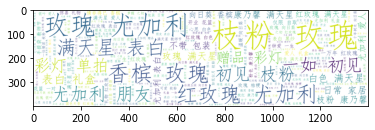

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='simfang.ttf',background_color='white',width=1400,height = 400)
wordcloud.generate(' '.join(text_list))

plt.imshow(wordcloud)

In [62]:
import jieba.analyse
# index = 1000

In [63]:
# 提取关键字
X = ' '.join(jieba.analyse.extract_tags(content, topK=20,withWeight=False))
print(X)

枝粉 尤加利 11 玫瑰 红玫瑰 满天星 表白 礼盒 香槟 19 向日葵 康乃馨 33 教师节 爱人 单拍 初见 彩灯 赠品 桔梗


In [64]:
tag = jieba.analyse.extract_tags(content,topK = 20,withWeight = True)

In [65]:
tags_list  = []

In [66]:
for i in tag:
    tags_list.append((i[0],i[1]))
tags_pd = pd.DataFrame(tags_list, columns=['word', 'weight'])  # 创建数据框


In [67]:
tags_pd

,word,weight
0,枝粉,0.667643
1,尤加利,0.613563
2,11,0.585433
3,玫瑰,0.561235
4,红玫瑰,0.513319
5,满天星,0.507615
6,表白,0.379719
7,礼盒,0.297161
8,香槟,0.289079
9,19,0.253895


In [68]:
 tags_pairs = jieba.analyse.textrank(content,  topK=20,  withWeight=True)  # 提取关键字标签

In [69]:
tags_pairs

[('玫瑰', 1.0),
 ('枝粉', 0.8511935259604061),
 ('表白', 0.8151327938952995),
 ('礼盒', 0.658067271313946),
 ('教师节', 0.35009652449301565),
 ('香槟', 0.31393852065821387),
 ('爱人', 0.29161357731446685),
 ('向日葵', 0.28386092418390596),
 ('花篮', 0.25633194027441936),
 ('赠品', 0.2467048221773278),
 ('桔梗', 0.2184684905705073),
 ('初见', 0.20337403619242855),
 ('彩灯', 0.19707264881191136),
 ('朋友', 0.18530471035333235),
 ('开业', 0.1842345216023772),
 ('黑纱', 0.15646795508959996),
 ('手提袋', 0.1430069974269398),
 ('心思', 0.13704459289997975),
 ('粉色', 0.13542503667661582),
 ('白色', 0.11607161210744721)]

In [79]:
zi = '粉玫瑰'
count =wenzi(list_name,zi)
count

关于“粉玫瑰”的订单数量是： 5304


['致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】',
 '一笑千金【9枝粉玫瑰满天星鲜花花束】',
 '冰清玉润【3枝向日葵+3枝粉玫瑰表白鲜花花束】',
 '师恩似海【3枝向日葵+3枝粉玫瑰教师节鲜花花束】',
 '盈盈相思【11枝粉玫瑰桔梗尤加利送朋友表白混搭鲜花花束】',
 '一如初见【9枝粉玫瑰搭配满天星鲜花花束】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '清风与你【11枝粉玫瑰搭配尤加利送爱人鲜花花束】',
 '一如初见【9枝粉玫瑰搭配满天星鲜花花束】',
 '一笑千金【9枝粉玫瑰满天星鲜花花束】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '芊芊细语【52枝粉玫瑰搭配满天星表白鲜花花束】',
 '琴瑟之好【11枝粉玫瑰搭配尤加利鲜花花束】',
 '婉婉有仪【11枝粉康乃馨+8枝粉玫瑰韩式花束】',
 '花容月貌【9枝粉玫瑰+2枝向日葵鲜花花束】',
 '白首相知【11枝粉玫瑰搭配桔梗花束】',
 '思念的人【33枝粉玫瑰送闺蜜鲜花花束】',
 '默默的爱【33枝粉玫瑰搭配黄莺送闺蜜鲜花礼盒】',
 '一往情深【11枝粉玫瑰搭配满天星送爱人鲜花礼盒】',
 '芊芊细语【52枝粉玫瑰搭配满天星表白鲜花花束】',
 '一往情深【11枝粉玫瑰搭配满天星送爱人鲜花礼盒】',
 '梦里花开【33枝粉玫瑰搭配尤加利抱抱桶】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '可爱的你【33枝粉玫瑰搭配银叶送爱人鲜花花束】',
 '一念花开【33枝粉玫瑰送爱人表白鲜花礼盒】',
 '盈盈相思【11枝粉玫瑰桔梗尤加利送朋友表白混搭鲜花花束】',
 '一笑千金【9枝粉玫瑰满天星鲜花花束】',
 '浪漫同行【8枝粉玫瑰+3枝白玫瑰鲜花表白礼盒】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '天荒地老【33枝粉玫瑰搭配粉色满天星表白鲜花花束】',
 '风情月意【33枝粉玫瑰搭配满天星表白鲜花抱抱桶】',
 '冰清玉润【3枝向日葵+3枝粉玫瑰表白鲜花花束】',
 '一笑千金【9枝粉玫瑰满天星鲜花花束】',
 '一如初见【9枝粉玫瑰搭配满天星鲜花花束】',
 '一如初见【9枝粉玫瑰搭配满天星鲜花花束】',
 '爱如初【33枝粉玫瑰搭配绣球桔梗表白鲜花花束

In [71]:
zi = '红玫瑰'
count =wenzi(list_name,zi)

关于“红玫瑰”的订单数量是： 5282


In [78]:
zi = '向日葵'
count =wenzi(list_name,zi)

关于“向日葵”的订单数量是： 2917


In [73]:
zi = '尤加利'
count =wenzi(list_name,zi)
count

关于“尤加利”的订单数量是： 5911


['见花如见面【11枝红玫瑰搭配尤加利花束】',
 '情深蒂固【19枝红玫瑰搭配尤加利送朋友鲜花花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '情非得已【9枝香槟玫瑰搭配尤加利鲜花花束】',
 '盈盈相思【11枝粉玫瑰桔梗尤加利送朋友表白混搭鲜花花束】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '清风与你【11枝粉玫瑰搭配尤加利送爱人鲜花花束】',
 '情非得已【9枝香槟玫瑰搭配尤加利鲜花花束】',
 '国色天香【11枝红玫瑰搭配尤加利鲜花礼盒】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '一世爱人【11枝红玫瑰搭配尤加利表白花束】',
 '国色天香【11枝红玫瑰搭配尤加利鲜花礼盒】',
 '微笑的你【11枝香槟玫瑰搭配尤加利鲜花花束】',
 '缘来是你【11枝红玫瑰搭配尤加利表白鲜花礼盒】',
 '爱你一万年【9枝红玫瑰搭配尤加利表白鲜花花束】',
 '温柔如水【19枝红玫瑰搭配尤加利表白鲜花花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '情非得已【9枝香槟玫瑰搭配尤加利送朋友鲜花花束】',
 '情非得已【9枝香槟玫瑰搭配尤加利鲜花花束】',
 '琴瑟之好【11枝粉玫瑰搭配尤加利鲜花花束】',
 '仪态万千【19枝红玫瑰搭配尤加利表白鲜花礼盒】',
 '火树银花【19枝香槟玫瑰尤加利花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利表白鲜花花束】',
 '相亲相爱【19枝红玫瑰搭配尤加利送女友鲜花花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '仪态万千【19枝红玫瑰搭配尤加利表白鲜花礼盒】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '情非得已【9枝香槟玫瑰搭配尤加利鲜花花束】',
 '梦里花开【33枝粉玫瑰搭配尤加利抱抱桶】',
 '一如初见【9枝粉玫瑰搭配尤加利送朋友鲜花花束】',
 '爱你一万年【9枝红玫瑰搭配尤加利送爱人鲜花花束】',
 '爱慕倾心【19枝香槟玫瑰搭配尤加利表白鲜花花束】',
 '情深蒂固【19枝红玫瑰搭配尤加利送朋友鲜花花束】',
 '

In [74]:
zi = '满天星'
count =wenzi(list_name,zi)

关于“满天星”的订单数量是： 5331


In [85]:
zi = '11枝'
count =wenzi(list_name,zi)

关于“11枝”的订单数量是： 5624


In [84]:
zi = '19枝'
count =wenzi(list_name,zi)

关于“19枝”的订单数量是： 2411


In [83]:
zi = '33枝'
count =wenzi(list_name,zi)

关于“33枝”的订单数量是： 1741


In [87]:
zi = '9枝'
count =wenzi(list_name,zi)


关于“9枝”的订单数量是： 5980
